In [8]:
import pandas as pd

# Example 2: Raw string
dataset_path = r"C:\Users\ASUS\Downloads\BD Final_train.csv"

# Read the dataset into a Pandas DataFrame
data = pd.read_csv(dataset_path)
dataset = data.drop(['Food name in English'], axis=1)
dataset = dataset.drop(['Food name in Bengali'], axis=1)


In [9]:
dataset

,Energy,Protein,Fat,Carbohydrate available,Total dietary fibre,Ash,Na,Remarks
0,398,13.4,20.9,28.6,21.0,10.0,5,1
1,344,5.8,10.0,56.6,2.4,0.8,83,0
2,348,7.6,2.3,72.4,3.8,1.3,5,1
3,270,8.8,2.8,50.9,2.8,1.7,501,0
4,112,2.4,0.7,23.2,1.2,0.4,4,1
...,...,...,...,...,...,...,...,...
195,179,15.1,13.2,0.0,0.0,1.0,148,0
196,82,1.5,0.2,16.6,4.1,1.0,16,1
197,325,16.0,27.8,2.6,0.0,1.7,48,0
198,92,1.6,0.2,18.6,4.6,1.1,15,1


In [10]:
import pandas as pd
import numpy as np
# first neural network with keras tutorial
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

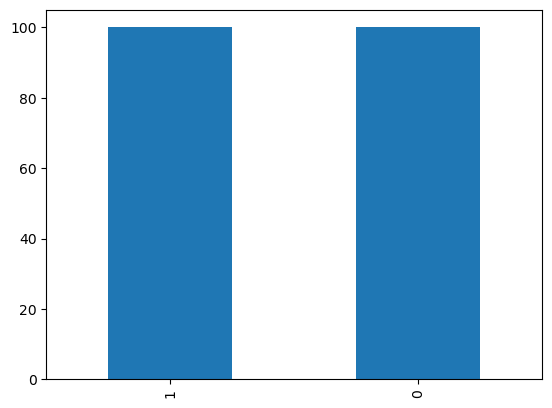

In [11]:
import seaborn as sns
dataset['Remarks'].value_counts().plot(kind='bar')
#input and output variables
X = dataset.iloc[:,0:7]
Y = dataset.iloc[:,7]

In [12]:
X

,Energy,Protein,Fat,Carbohydrate available,Total dietary fibre,Ash,Na
0,398,13.4,20.9,28.6,21.0,10.0,5
1,344,5.8,10.0,56.6,2.4,0.8,83
2,348,7.6,2.3,72.4,3.8,1.3,5
3,270,8.8,2.8,50.9,2.8,1.7,501
4,112,2.4,0.7,23.2,1.2,0.4,4
...,...,...,...,...,...,...,...
195,179,15.1,13.2,0.0,0.0,1.0,148
196,82,1.5,0.2,16.6,4.1,1.0,16
197,325,16.0,27.8,2.6,0.0,1.7,48
198,92,1.6,0.2,18.6,4.6,1.1,15


In [13]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
195    0
196    1
197    0
198    1
199    0
Name: Remarks, Length: 200, dtype: int64

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores are [0.675 0.525 0.85  0.95  0.775]
Average Cross Validation score :0.755


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#create train and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(180, 7) (180,)
(20, 7) (20,)


In [16]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_iris

# Load sample dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression model with increased max_iter and different solver
logreg = LogisticRegression(max_iter=1000, solver='saga')

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
score = cross_val_score(logreg, X_scaled, Y, cv=kf)

# Print results
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


Cross Validation Scores are [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average Cross Validation score :0.9600000000000002


In [17]:
#create train and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(135, 4) (135,)
(15, 4) (15,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
file_path = r"C:\Users\ASUS\Downloads\BD Final_train.csv"
df = pd.read_csv(file_path)

df = df.drop(['Food name in English'], axis=1)
df = df.drop(['Food name in Bengali'], axis=1)

# Splitting the dataset into input features and output target
X = df.drop('Remarks', axis=1).values
y = df['Remarks'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)



Epoch 1/100
16/16 [==============================] - 3s 8ms/step - loss: 0.6930 - accuracy: 0.5875
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6684 - accuracy: 0.6062
Epoch 3/100
16/16 [==============================] - 1s 46ms/step - loss: 0.6495 - accuracy: 0.6687
Epoch 4/100
16/16 [==============================] - 0s 21ms/step - loss: 0.6330 - accuracy: 0.7000
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6187 - accuracy: 0.7312
Epoch 6/100
16/16 [==============================] - 0s 14ms/step - loss: 0.6050 - accuracy: 0.7500
Epoch 7/100
16/16 [==============================] - 0s 13ms/step - loss: 0.5901 - accuracy: 0.7750
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5755 - accuracy: 0.7750
Epoch 9/100
16/16 [==============================] - 0s 12ms/step - loss: 0.5615 - accuracy: 0.7937
Epoch 10/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5463 - accuracy: 0.7937
Epo

In [20]:
# Evaluating the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 1s 15ms/step - loss: 0.4576 - accuracy: 0.9000
Accuracy: 90.00


In [5]:
# Building the ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
import pandas as pd
import numpy as np
# first neural network with keras tutorial
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [22]:
# Save the model to a file
model.save("bd_model_test.h5")


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
import matplotlib.pyplot as plt

# Load your saved model
model = load_model('bd_model_test.h5')

# Assuming you have loaded your dataset and preprocessed it
# Replace this with your actual data loading and preprocessing steps
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate the model on training and validation data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

# Since we don't have access to the training history, we cannot plot it
# However, we can still print the accuracy values


NameError: name 'X_train' is not defined